# Is the Cervical Spine fractured?

In this notebook I started with the notebook 'Is it a bird?' by the first lesson of the fastai course.

I wanted to use it to make a first guess for the new kaggle competition [RSNA 2022 Cervical Spine Fracture Detection
](https://www.kaggle.com/competitions/rsna-2022-cervical-spine-fracture-detection/code).

The approach is a bit different because I am not searching for pictures on the web but using the dataset provided in the kaggle competition.

In [1]:
!pip install -Uqq fastai

In [2]:
from fastcore.all import *
from fastai.vision.all import *
import pandas as pd
import os

In [3]:
# defining the path to our training images
path = Path('../input/rsna-csfd-256x256-jpg-dataset/train_images')

Let's have a look at the table with the target:

In [4]:
df = pd.read_csv('../input/rsna-2022-cervical-spine-fracture-detection/train.csv')
df.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0


The target here is the column <code>patient_overall</code>, which shows a 1 if the patient is fractured.

## Train our model

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

In [5]:
#taking first image in every folder
def get_x(r): return path/r['StudyInstanceUID']/os.listdir(path/r['StudyInstanceUID'])[0]
def get_y(r): return r['patient_overall']

In [6]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)

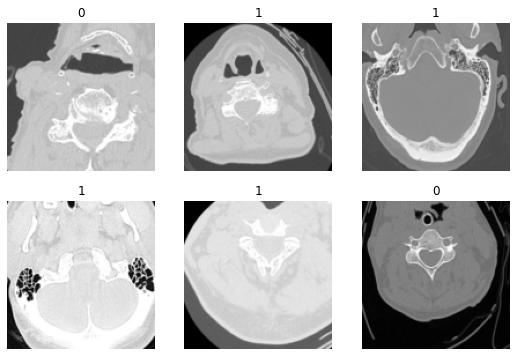

In [7]:
dls.show_batch(max_n=6)

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(30)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.371156,1.110619,0.449132,00:58


epoch,train_loss,valid_loss,error_rate,time
0,1.206880,0.874176,0.426799,00:09
1,1.170874,0.903664,0.446650,00:10
2,1.098885,0.864314,0.431762,00:09
3,1.038828,0.897510,0.441687,00:09
4,0.999575,0.891119,0.444169,00:09
5,0.960714,0.850064,0.411911,00:11
6,0.906152,0.859409,0.431762,00:09
7,0.853849,0.927054,0.459057,00:09
8,0.800852,0.858143,0.404467,00:10
9,0.755646,0.881015,0.414392,00:09


## Conclusions

As we can see, the error rate is quite bad with 0.38. What can we do to improve?
- Not randomly take the first image from every patient to compare but get a clue of which image is valuable for finding the target
- preprocess images so they are better comparable 
- Do a general EDA to get a sense of the topic